### 8CH experiment for SSH

In [2]:
import numpy as np                                                                                                                                                                                  
import xarray as xr                                                                                                                                                                                 
import os                                                                                                                                                                                           
import matplotlib.pyplot as plt                                                                                                                                                                     
import matplotlib.cm as cm    
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                  
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
from myfuncts2  import *
import myfuncts 
%load_ext autoreload
%autoreload 2
from scipy.ndimage import gaussian_filter1d
                                                                                                                                                                                                    
  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Train with more channels is ssh layer 

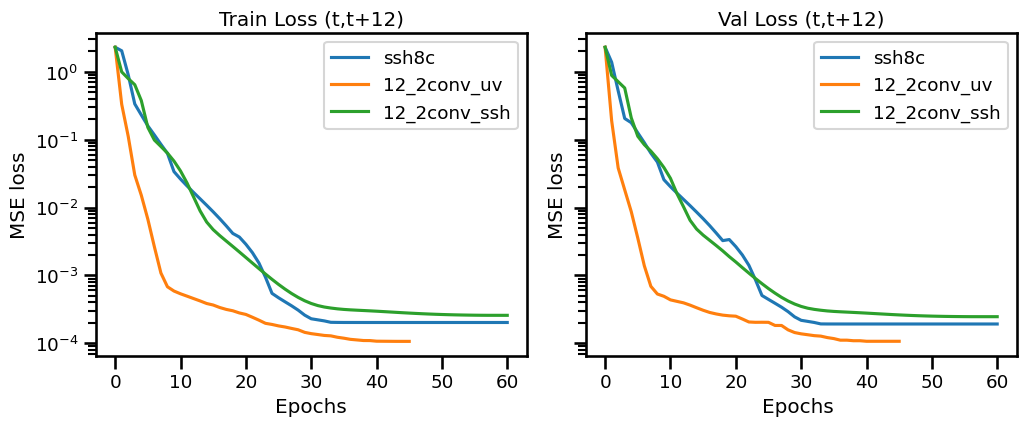

1.2750127146283174

In [282]:

sims=myfuncts.load_tst6a()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)

ax1.title.set_text('Train Loss (t,t+12)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')


ax2.title.set_text('Val Loss (t,t+12)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')

ax2.legend()



plt.tight_layout()
plt.show()
sims[2].tloss[-1]/sims[0].tloss[-1]

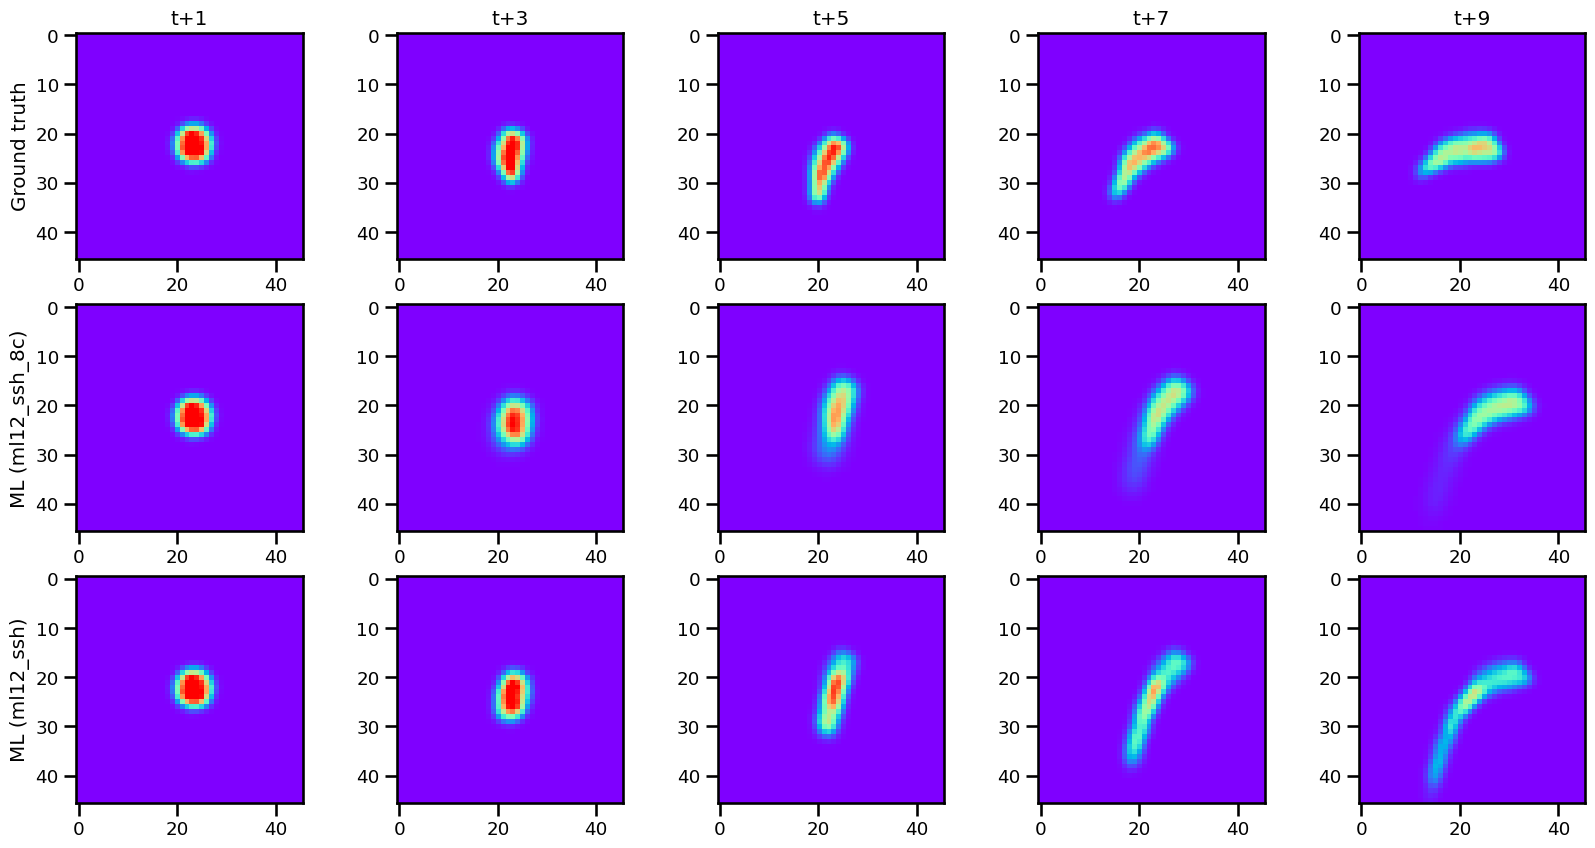

In [290]:


gt, ssh_8c, ssh  =myfuncts.load_tst6b()

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(ssh[i], axis=None), ssh[i].shape)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ssh_8c[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(ssh[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (ml12_ssh_8c)')
axs[2,0].set_ylabel('ML (ml12_ssh)')
plt.show()